In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [93]:
data = pd.read_csv("Iris.csv")

In [94]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
data = data.set_index("Id")

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


<AxesSubplot: >

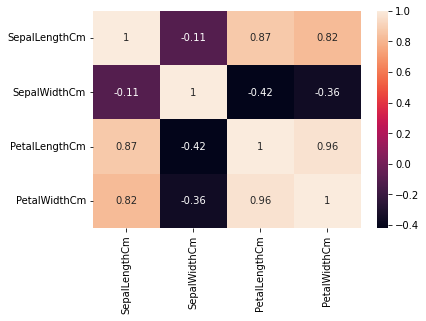

In [97]:
sns.heatmap(data.corr(), annot = True, linecolor='black')

In [98]:
features = data.iloc[:,0:4]

In [99]:
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [100]:
target = data.iloc[:,4]

In [101]:
target

Id
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: Species, Length: 150, dtype: object

In [102]:
from sklearn.cluster import KMeans
inertia_values=[]
for i in range(1,6):
    km = KMeans(i)
    km.fit(features)
    inertia_values.append(km.inertia_)
np.array(inertia_values)

array([680.8244    , 152.36870648,  78.94084143,  57.31787321,
        46.56163016])

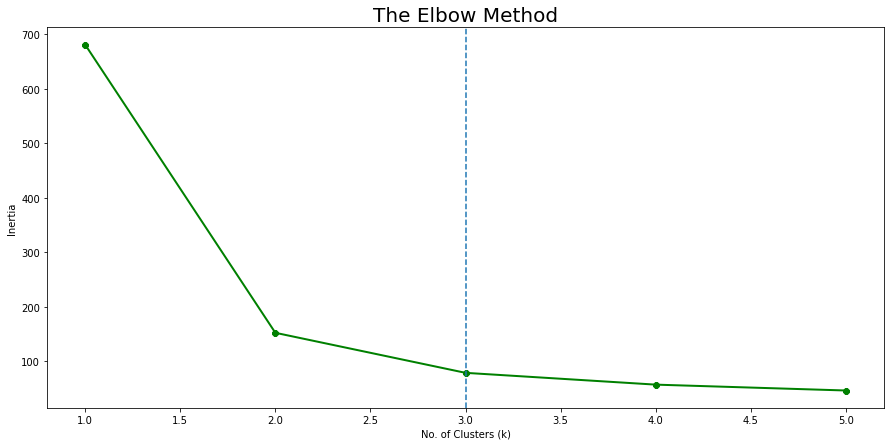

In [103]:
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,6),inertia_values, linewidth=2, color="green", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('Inertia')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [104]:
kmean = KMeans(n_clusters=3, init='k-means++')
kmean.fit(features)

KMeans(n_clusters=3)

In [105]:
y_kmeans = kmean.fit_predict(features)
features['Predicted_Clusters'] = y_kmeans
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted_Clusters
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1


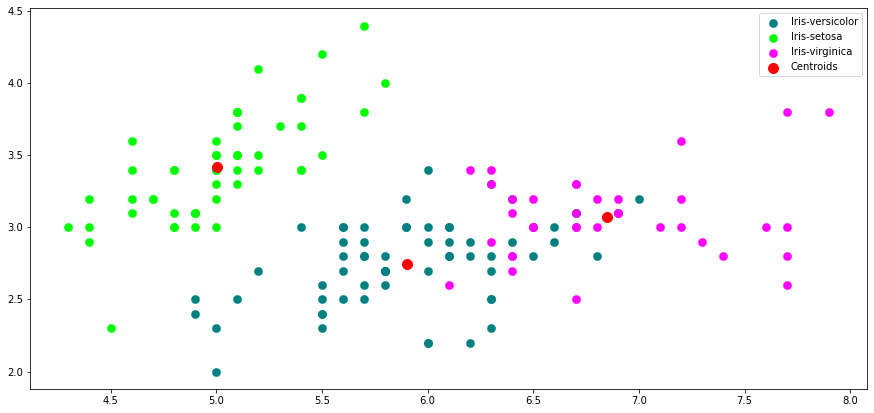

In [106]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=features[features['Predicted_Clusters'] == 0]['SepalLengthCm'],
            y=features[features['Predicted_Clusters'] == 0]['SepalWidthCm'],
            s=70, linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=features[features['Predicted_Clusters'] == 1]['SepalLengthCm'],
            y=features[features['Predicted_Clusters'] == 1]['SepalWidthCm'],
            s=70, linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=features[features['Predicted_Clusters'] == 2]['SepalLengthCm'],
            y=features[features['Predicted_Clusters'] == 2]['SepalWidthCm'],
            s=70, linewidth=0.3, c='magenta', label='Iris-virginica')
plt.scatter(x=kmean.cluster_centers_[:, 0], 
            y=kmean.cluster_centers_[:, 1], 
            s = 100, c = 'red', label = 'Centroids', linewidth=1)
plt.legend(loc='upper right')

In [3]:
%%html
---

![logo](images/logo.png)
<p style='text-align: center;'> THE SPARKS FOUNDATION</p>
<h1 align="center">K-Means Clsutering on Iris Dataset</h1> 
<div style="text-align: left">Created<br>
    by Mahmoudi Oussama<br>
for The Sparks Foundation</div>